# Teil B

## Libraries und Daten laden

In [2]:
import tensorflow
from tensorflow.keras import models
from tensorflow.keras.layers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.optimizers import *
import matplotlib.pyplot as plt
import numpy as np

2024-06-20 14:56:46.723069: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Aufgabe B.1** Laden Sie die Datei data_S9_B.npz via np.load() und holen Sie sich die array x und y

In [16]:
import os

# Daten laden
data = np.load(os.path.join('assets', 's09_data_B.npz'))
print(data)

NpzFile 'assets/s09_data_B.npz' with keys: x, y


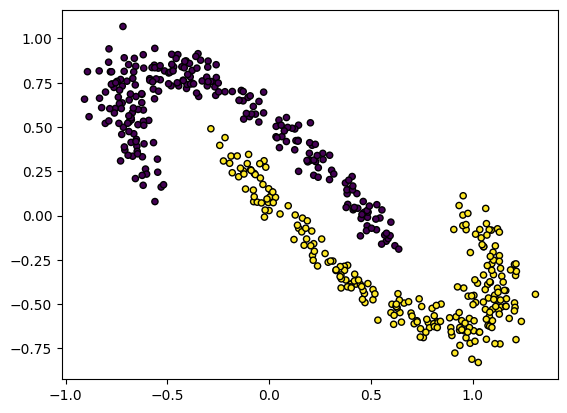

In [18]:
x = data['x']
y = data['y']

plt.scatter(x[:,0],x[:,1],s=20,edgecolors='k',c=y)

## Aufteilung Trainings- / Testdaten

**Aufgabe B.2** Teilen Sie die Daten zufällig zu 70/30% in Trainings/Testdaten auf

Tipp: `np.random.permutation`

In [28]:
from sklearn.model_selection import train_test_split

# Aufteilung Training/Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [29]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(500, 2)
(350, 2)
(150, 2)


## Definition Netzwerk

**Aufgabe B.3** Führen Sie die untenstehenden Zellen aus.

Wie ist hier das neuronale Netz definiert?

In [30]:
# Definition des Keras Modells
model = models.Sequential()
model.add(Input(shape=(2,)))# Input
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Layer
lr=0.01
optimizer = Adam()#(learning_rate=lr)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [31]:
# Training
history=model.fit(x_train, y_train, epochs=200, batch_size=32,validation_data=[x_test, y_test])
# Evaluation auf Test-Daten
L, accuracy = model.evaluate(x_test, y_test)
print('Loss: %.2f' % L +',  Accuracy: %.2f' % (accuracy*100))

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5052 - loss: 0.7343 - val_accuracy: 0.4933 - val_loss: 0.7261
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4942 - loss: 0.7227 - val_accuracy: 0.4933 - val_loss: 0.7064
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4999 - loss: 0.6993 - val_accuracy: 0.4867 - val_loss: 0.6887
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4814 - loss: 0.6879 - val_accuracy: 0.4800 - val_loss: 0.6716
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4562 - loss: 0.6723 - val_accuracy: 0.4467 - val_loss: 0.6534
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4662 - loss: 0.6461 - val_accuracy: 0.4533 - val_loss: 0.6343
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5500 - loss: 0.6375 - val_accuracy: 0.7467 - val_loss: 0.6163
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7164 - loss: 0.6217 - val_accuracy: 0.7800 -

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


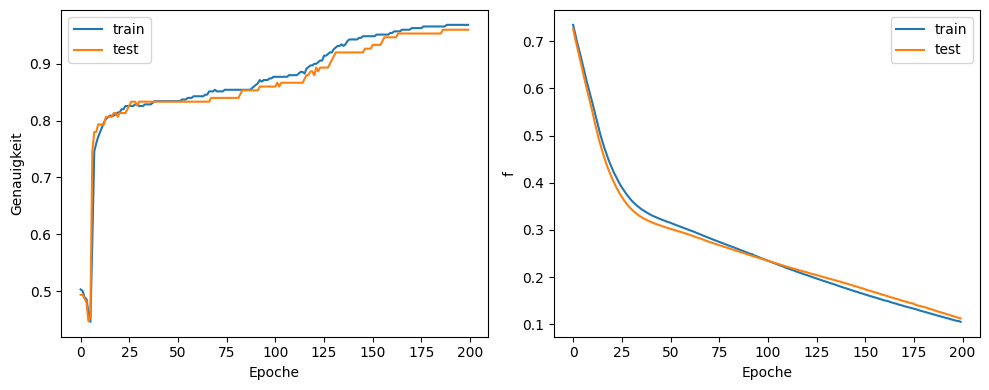

In [39]:
print(history.history.keys())

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_ylabel('Genauigkeit')
axs[0].set_xlabel('Epoche')
axs[0].legend(['train', 'test'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_ylabel('f')
axs[1].set_xlabel('Epoche')
axs[1].legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

In [33]:
y_pred=model.predict(x_test).reshape(-1)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

from tensorflow.math import confusion_matrix
confusion_matrix(y_test, y_pred.astype(int))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[73,  3],
       [ 3, 71]], dtype=int32)>

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


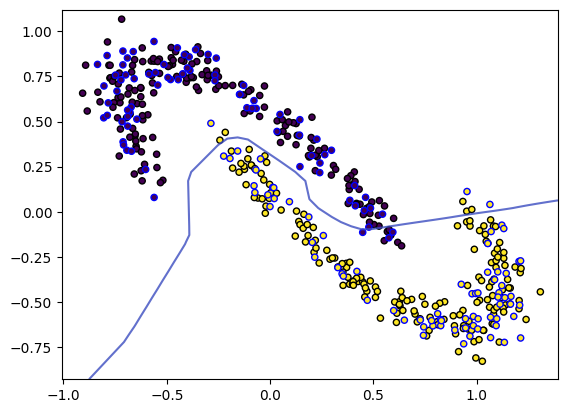

In [34]:
# decision boundary plotten 
h=0.05
x_min, x_max = x[:,0].min() - 0.1, x[:,0].max() + 0.1
y_min, y_max = x[:,1].min() - 0.1, x[:,1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5],cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],s=20,edgecolors='k',c=y_train)
plt.scatter(x_test[:,0],x_test[:,1],s=20,edgecolors='b',c=y_test)

## Verbesserungen

> **Aufgabe B.4** Wie könnten man die Genauigkeit verbessern? Experimentieren Sie gern mit den Einstellungen.

- Training länger laufen lassen
- mehr Neuronen
- mehr Schichten